In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
handle = 'real_eco_speczerrs'
dire = f'/srv/two/zhutchen/paper3/catalogs/{handle}/'

In [3]:
catnames = os.listdir(dire)
nn = len(catnames)
Pth = np.zeros(nn)
ix = np.arange(0,nn)
cbar_tr = np.zeros(nn)
cbar_rt = np.zeros(nn)
pbar_tr = np.zeros(nn)
pbar_rt = np.zeros(nn)
cbar_tr_err = np.zeros(nn)
cbar_rt_err = np.zeros(nn)
pbar_tr_err = np.zeros(nn)
pbar_rt_err = np.zeros(nn)


statistic = np.mean
stat2 = lambda x: np.std(x)/np.sqrt(len(x))

for i,ff in enumerate(catnames):
    catalog = pd.read_csv(dire+ff)
    catalog = catalog[(catalog.absrmag<=-17.33)]

    Pth[i] = catalog.Pth.iloc[0]
    cbar_tr[i] = statistic(catalog.C_TR)
    cbar_rt[i] = statistic(catalog.C_RT)
    pbar_tr[i] = statistic(catalog.P_TR)
    pbar_rt[i] = statistic(catalog.P_RT)

    cbar_tr_err[i] = stat2(catalog.C_TR)
    cbar_rt_err[i] = stat2(catalog.C_RT)
    pbar_tr_err[i] = stat2(catalog.P_TR)
    pbar_rt_err[i] = stat2(catalog.P_RT)

optimal_pth_ptimesc_tr = Pth[np.argmax(pbar_tr*cbar_tr)]
optimal_pth_ptimesc_rt = Pth[np.argmax(pbar_rt*cbar_rt)]

In [4]:
labels = {
    'c_tr' : r'$\bar{C}_{TR}$',
    'p_tr' : r'$\bar{P}_{TR}$',
    'c_rt' : r'$\bar{C}_{RT}$',
    'p_rt' : r'$\bar{P}_{RT}$',
    'ptimesc_tr' : r'$\bar{P}_{TR}\times \bar{C}_{TR}$',
    'ptimesc_rt' : r'$\bar{P}_{RT}\times \bar{C}_{RT}$',
}

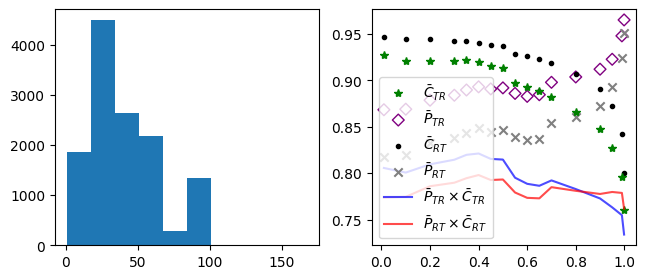

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(7.5,4.38*0.7))
axs[0].hist(catalog.czerr)

axs[1].plot(Pth, cbar_tr, 'g*', label=labels['c_tr'])
axs[1].scatter(Pth, pbar_tr, color='purple', marker='D', edgecolor='purple', facecolor="None", label=labels['p_tr'])
axs[1].scatter(Pth, cbar_rt, color='k', marker='.', label=labels['c_rt'])
axs[1].scatter(Pth, pbar_rt, color='gray', marker='x', label=labels['p_rt'])
axs[1].plot(Pth, pbar_tr*cbar_tr, 'b-', alpha=0.7, label=labels['ptimesc_tr'])
axs[1].plot(Pth, pbar_rt*cbar_rt, 'r-', alpha=0.7, label=labels['ptimesc_rt'])
axs[1].legend(loc='best')

plt.show()

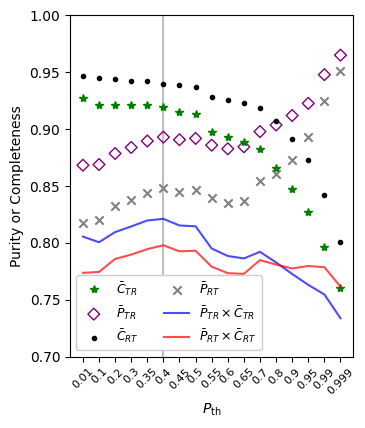

best pbar_tr: [89.30271296] +/- [0.15135282]
best cbar_tr: [91.9526265] +/- [0.1669928]
best pbar_rt: [84.87235884] +/- [0.23634404]
best cbar_rt: [94.01654071] +/- [0.12694718]


In [6]:
plt.figure(figsize=(3.75,4.38))
ix_opt = ix[Pth==optimal_pth_ptimesc_rt]
plt.axvline(ix_opt, color='gray', zorder=0, alpha=0.5)
plt.plot(ix, cbar_tr, 'g*', label=labels['c_tr'])
plt.scatter(ix, pbar_tr, color='purple', marker='D', edgecolor='purple', facecolor="None", label=labels['p_tr'])
plt.scatter(ix, cbar_rt, color='k', marker='.', label=labels['c_rt'])
plt.scatter(ix, pbar_rt, color='gray', marker='x', label=labels['p_rt'])
plt.plot(ix, pbar_tr*cbar_tr, 'b-', alpha=0.7, label=labels['ptimesc_tr'])
plt.plot(ix, pbar_rt*cbar_rt, 'r-', alpha=0.7, label=labels['ptimesc_rt'])
plt.xticks(ix, labels=Pth, rotation=45, fontsize=8)
plt.xlabel(r'$P_{\rm th}$')
plt.ylabel('Purity or Completeness')
plt.ylim(0.7,1)
plt.legend(loc='best', ncols=2, framealpha=1, fontsize=9)
plt.tight_layout()
plt.savefig("../figures/optimization_w_allspecz.pdf",dpi=300)
plt.show()

chosen = Pth[ix_opt]
print(f'best pbar_tr: {100*pbar_tr[Pth==chosen]} +/- {100*pbar_tr_err[Pth==chosen]}')
print(f'best cbar_tr: {100*cbar_tr[Pth==chosen]} +/- {100*cbar_tr_err[Pth==chosen]}')
print(f'best pbar_rt: {100*pbar_rt[Pth==chosen]} +/- {100*pbar_rt_err[Pth==chosen]}')
print(f'best cbar_rt: {100*cbar_rt[Pth==chosen]} +/- {100*cbar_rt_err[Pth==chosen]}')